<a href="https://colab.research.google.com/github/mohadesehsotoudehnia/FIS-projects/blob/main/MiniProject1%20/%20Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q4**

In [ ]:
# Setup and download dataset
!pip install -q gdown

import gdown, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings("ignore")

# Google Drive file ID for teleCust1000t.csv
file_id = "1JvUts-xUwjZ5BQfyT1xMIB4gXsruIQmp"
url = f"https://drive.google.com/uc?id={file_id}"
save_path = "/content/teleCust1000t.csv"

# Download the file
gdown.download(url, save_path, quiet=False)

# Verify the file
if os.path.exists(save_path):
    print("File downloaded successfully!")
    print("Saved to:", save_path, "| Size:", os.path.getsize(save_path), "bytes")
else:
    print("Download failed. Check the link or permissions.")

Downloading...
From: https://drive.google.com/uc?id=1JvUts-xUwjZ5BQfyT1xMIB4gXsruIQmp
To: /content/teleCust1000t.csv
100%|██████████| 29.0k/29.0k [00:00<00:00, 39.5MB/s]

File downloaded successfully!
Saved to: /content/teleCust1000t.csv | Size: 29046 bytes


In [ ]:

# Load dataset and preview
df = pd.read_csv("/content/teleCust1000t.csv")
print("Shape:", df.shape)
df.head()

Shape: (1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [ ]:

# Dataset overview
print("=== INFO ===")
df.info()

print("\n=== DESCRIBE (numeric) ===")
display(df.describe().T)

print("\n=== DESCRIBE (categorical/object) ===")
obj_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
if obj_cols:
    display(df[obj_cols].describe().T)
else:
    print("No object/category columns detected.")
    # As a proxy, show value-counts for low-cardinality numeric columns (likely coded categories)
    maybe_codes = [c for c in df.select_dtypes(include=[np.number]).columns
                   if c != "custcat" and df[c].nunique() <= 10]
    if maybe_codes:
        print("\nNumeric columns with low cardinality (likely categorical codes):", maybe_codes)
        for c in maybe_codes:
            print(f"\nValue counts for '{c}':")
            print(df[c].value_counts().sort_index())
    else:
        print("No low-cardinality numeric columns either.")

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   region   1000 non-null   int64
 1   tenure   1000 non-null   int64
 2   age      1000 non-null   int64
 3   marital  1000 non-null   int64
 4   address  1000 non-null   int64
 5   income   1000 non-null   int64
 6   ed       1000 non-null   int64
 7   employ   1000 non-null   int64
 8   retire   1000 non-null   int64
 9   gender   1000 non-null   int64
 10  reside   1000 non-null   int64
 11  custcat  1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB

=== DESCRIBE (numeric) ===


,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0



=== DESCRIBE (categorical/object) ===
No object/category columns detected.

Numeric columns with low cardinality (likely categorical codes): ['region', 'marital', 'ed', 'retire', 'gender', 'reside']

Value counts for 'region':
region
1    322
2    334
3    344
Name: count, dtype: int64

Value counts for 'marital':
marital
0    505
1    495
Name: count, dtype: int64

Value counts for 'ed':
ed
1    204
2    287
3    209
4    234
5     66
Name: count, dtype: int64

Value counts for 'retire':
retire
0    953
1     47
Name: count, dtype: int64

Value counts for 'gender':
gender
0    483
1    517
Name: count, dtype: int64

Value counts for 'reside':
reside
1    375
2    272
3    138
4    120
5     60
6     29
7      4
8      2
Name: count, dtype: int64


In [ ]:
# Identify numeric and categorical columns
TARGET_COL = "custcat"

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Remove target column from feature lists
for lst in (num_cols, cat_cols):
    if TARGET_COL in lst:
        lst.remove(TARGET_COL)

# Find numeric columns with low cardinality (may be coded categories)
maybe_codes = [c for c in num_cols if df[c].nunique() <= 10]

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))
print("Numeric but low-cardinality (possible category codes):", maybe_codes)

Numeric columns: 11
Categorical columns: 0
Numeric but low-cardinality (possible category codes): ['region', 'marital', 'ed', 'retire', 'gender', 'reside']


In [ ]:
# Missing values profile
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct})
missing_df[missing_df["missing_count"] > 0]

,missing_count,missing_pct


In [ ]:
# Three imputation strategies
# A) Drop rows with any NaN
df_drop = df.dropna(axis=0).copy()

# B) Simple imputation (median for numeric, mode for categorical)
df_simple = df.copy()
if len(num_cols):
    df_simple[num_cols] = SimpleImputer(strategy="median").fit_transform(df_simple[num_cols])
if len(cat_cols):
    df_simple[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df_simple[cat_cols])

# C) KNN imputation for numeric columns
df_knn = df.copy()
for c in cat_cols:
    df_knn[c] = df_knn[c].fillna(df_knn[c].mode().iloc[0])
if len(num_cols):
    df_knn[num_cols] = KNNImputer(n_neighbors=5, weights="distance").fit_transform(df_knn[num_cols])

print("After dropna ->", df_drop.shape)
print("SimpleImputer missing total:", df_simple.isna().sum().sum())
print("KNNImputer missing total:", df_knn.isna().sum().sum())

After dropna -> (1000, 12)
SimpleImputer missing total: 0
KNNImputer missing total: 0


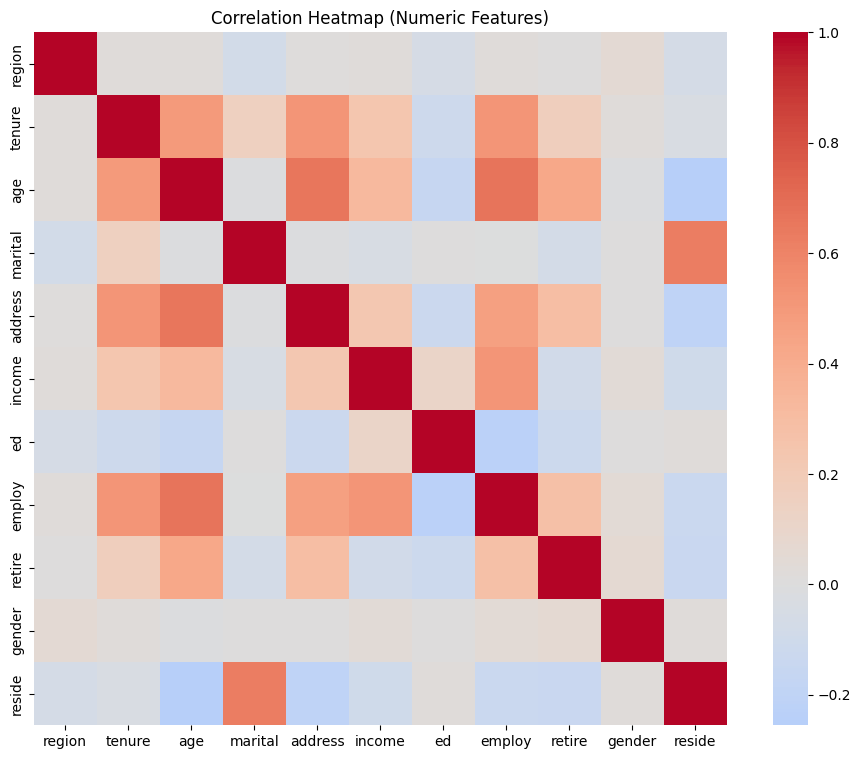

Highly correlated pairs (|r| >= 0.9): []


In [ ]:

# Correlation heatmap (numeric only)
if len(num_cols) >= 2:
    corr = df_simple[num_cols].corr(method="pearson")
    plt.figure(figsize=(12,9))
    sns.heatmap(corr, cmap="coolwarm", center=0, square=True, cbar=True)
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()

    # Highly correlated pairs
    thr = 0.9
    high_pairs = [(a,b,float(corr.loc[a,b])) for i,a in enumerate(num_cols)
                  for j,b in enumerate(num_cols) if j>i and abs(corr.loc[a,b])>=thr]
    print("Highly correlated pairs (|r| >= 0.9):", high_pairs)

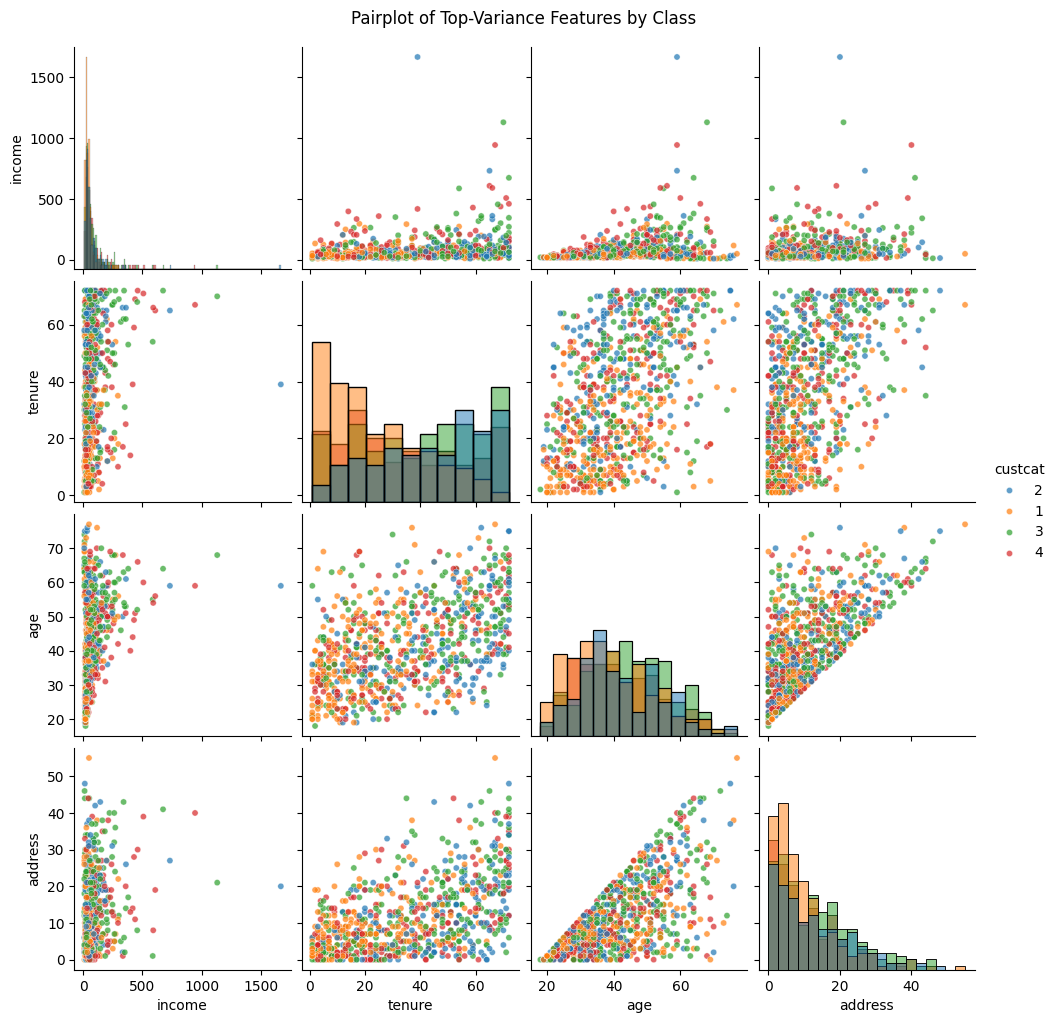

In [ ]:

# Pairplot of top-variance features
if len(num_cols):
    var_rank = df_simple[num_cols].var().sort_values(ascending=False)
    top_feats = var_rank.head(min(4, len(var_rank))).index.tolist()
    sample_df = df_simple.sample(n=min(800, len(df_simple)), random_state=42)
    plot_df = sample_df[top_feats + [TARGET_COL]].copy()
    plot_df[TARGET_COL] = plot_df[TARGET_COL].astype(str)

    sns.pairplot(plot_df, vars=top_feats, hue=TARGET_COL, diag_kind="hist",
                 plot_kws={"s":20, "alpha":0.7})
    plt.suptitle("Pairplot of Top-Variance Features by Class", y=1.02)
    plt.show()

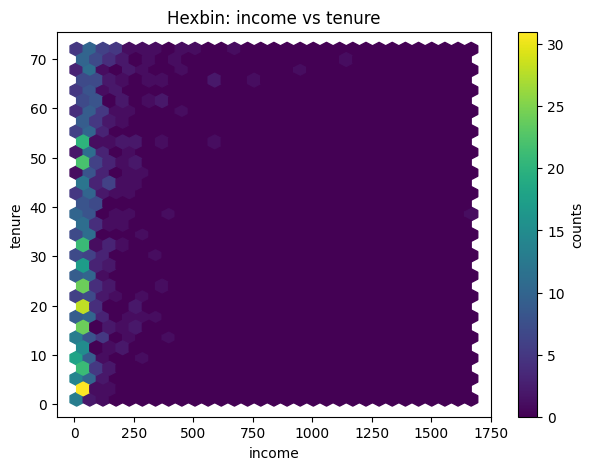

In [ ]:

# Hexbin for dense pair
if len(num_cols) >= 2:
    xcol, ycol = top_feats[0], top_feats[1]
    plt.figure(figsize=(7,5))
    plt.hexbin(sample_df[xcol], sample_df[ycol], gridsize=30)
    plt.xlabel(xcol); plt.ylabel(ycol)
    plt.title(f"Hexbin: {xcol} vs {ycol}")
    cb = plt.colorbar(); cb.set_label('counts')
    plt.show()

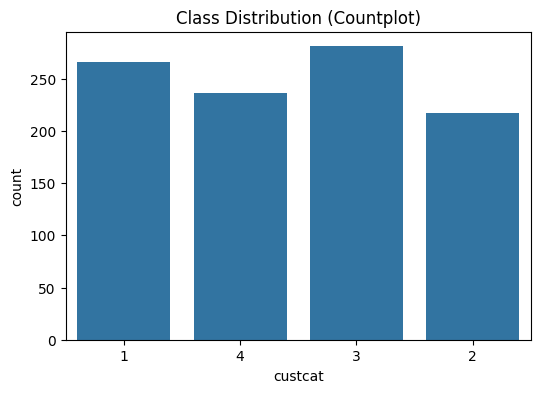

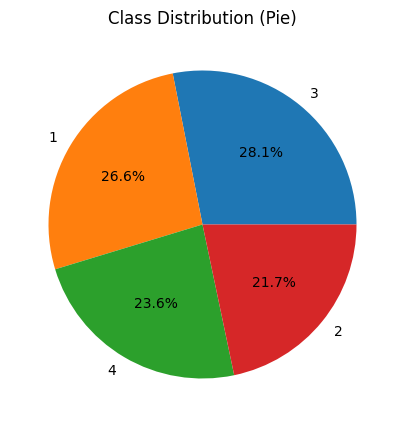

In [ ]:

# Target class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df[TARGET_COL].astype(str))
plt.title("Class Distribution (Countplot)")
plt.xlabel("custcat"); plt.ylabel("count")
plt.show()

plt.figure(figsize=(5,5))
df[TARGET_COL].astype(str).value_counts(normalize=True).plot(kind="pie", autopct="%.1f%%", ylabel="")
plt.title("Class Distribution (Pie)")
plt.show()

In [ ]:

# Quick class-balance table
def class_balance(series):
    vc = series.astype(str).value_counts()
    pct = (vc / vc.sum() * 100).round(1)
    return pd.DataFrame({"count": vc, "pct": pct})

class_balance(df[TARGET_COL])

,count,pct
custcat,,
3,281,28.1
1,266,26.6
4,236,23.6
2,217,21.7


In [ ]:

# Encoding categorical features
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical-like columns (numeric but representing categories)
cat_like_cols = ['gender', 'retire', 'custcat']

# Make a copy of the dataset to work on
df_enc = df.copy()

# Apply Label Encoding for binary columns
label_enc = LabelEncoder()
for c in ['gender', 'retire']:
    df_enc[c] = label_enc.fit_transform(df_enc[c])

# Apply One-Hot Encoding for multiclass target-like feature (custcat)
ohe = OneHotEncoder(sparse_output=False, drop=None)
custcat_encoded = ohe.fit_transform(df_enc[['custcat']])
custcat_cols = [f"custcat_{int(i)}" for i in ohe.categories_[0]]
df_ohe = pd.DataFrame(custcat_encoded, columns=custcat_cols)

# Concatenate back and drop original custcat column
df_pre = pd.concat([df_enc.drop(columns=['custcat']).reset_index(drop=True),
                    df_ohe.reset_index(drop=True)], axis=1)

print("Encoded dataframe shape:", df_pre.shape)
df_pre.head()

Encoded dataframe shape: (1000, 15)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat_1,custcat_2,custcat_3,custcat_4
0,2,13,44,1,9,64,4,5,0,0,2,1.0,0.0,0.0,0.0
1,3,11,33,1,7,136,5,5,0,0,6,0.0,0.0,0.0,1.0
2,3,68,52,1,24,116,1,29,0,1,2,0.0,0.0,1.0,0.0
3,2,33,33,0,12,33,2,0,0,1,1,1.0,0.0,0.0,0.0
4,2,23,30,1,9,30,1,2,0,0,4,0.0,0.0,1.0,0.0


In [ ]:
# Scale numeric (continuous) features
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Work on a copy
df_scaled = df_pre.copy()

# Identify columns that should NOT be scaled:
# 1) one-hot columns of target
ohe_cols = [c for c in df_scaled.columns if c.startswith("custcat_")]
# 2) categorical-like numeric columns (low cardinality, e.g., gender, retire, region, marital, reside)
cat_like = [c for c in df_scaled.columns
            if c not in ohe_cols and df_scaled[c].nunique() <= 10]

# Continuous numeric candidates = everything minus (ohe + cat_like)
cont_cols = [c for c in df_scaled.columns if c not in ohe_cols + cat_like]

# Apply StandardScaler (mean=0, std=1) on continuous features only
scaler = StandardScaler()
df_scaled[cont_cols] = scaler.fit_transform(df_scaled[cont_cols])

print("Continuous columns scaled:", cont_cols)
print("Categorical-like (not scaled):", cat_like)
print("One-hot columns (not scaled):", ohe_cols)

# Quick sanity check: mean≈0, std≈1 for scaled columns
check = pd.DataFrame({
    "mean": df_scaled[cont_cols].mean().round(3),
    "std":  df_scaled[cont_cols].std(ddof=0).round(3)
})
check.head()

Continuous columns scaled: ['tenure', 'age', 'address', 'income', 'employ']
Categorical-like (not scaled): ['region', 'marital', 'ed', 'retire', 'gender', 'reside']
One-hot columns (not scaled): ['custcat_1', 'custcat_2', 'custcat_3', 'custcat_4']


,mean,std
tenure,-0.0,1.0
age,0.0,1.0
address,-0.0,1.0
income,0.0,1.0
employ,-0.0,1.0


In [ ]:

# Remove highly correlated or redundant features
import numpy as np
import pandas as pd

# Compute correlation for scaled continuous features
corr = df_scaled.corr().abs()

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Define threshold for high correlation
threshold = 0.9

# Find columns with correlation above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Create a reduced dataframe without the redundant features
df_reduced = df_scaled.drop(columns=to_drop)

print("Highly correlated columns (|r| > 0.9):", to_drop if to_drop else "None found")
print("Final dataframe shape after removal:", df_reduced.shape)
df_reduced.head()

Highly correlated columns (|r| > 0.9): None found
Final dataframe shape after removal: (1000, 15)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat_1,custcat_2,custcat_3,custcat_4
0,2,-1.055125,0.184505,1,-0.253034,-0.126506,4,-0.594123,0,0,2,1.0,0.0,0.0,0.0
1,3,-1.148806,-0.691812,1,-0.451415,0.546450,5,-0.594123,0,0,6,0.0,0.0,0.0,1.0
2,3,1.521092,0.821826,1,1.234819,0.359517,1,1.787528,0,1,2,0.0,0.0,1.0,0.0
3,2,-0.118319,-0.691812,0,0.044536,-0.416251,2,-1.090300,0,1,1,1.0,0.0,0.0,0.0
4,2,-0.586722,-0.930808,1,-0.253034,-0.444291,1,-0.891829,0,0,4,0.0,0.0,1.0,0.0


In [ ]:

# Remove low-variance features
from sklearn.feature_selection import VarianceThreshold

# Make a copy
df_var = df_reduced.copy()

# Apply VarianceThreshold with a small threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_var)

# Get mask of kept features
keep_cols = df_var.columns[selector.get_support()]
drop_cols = df_var.columns[~selector.get_support()]

# Create reduced dataframe
df_final = df_var[keep_cols]

print("Removed low-variance columns:", list(drop_cols) if len(drop_cols) > 0 else "None found")
print("Final dataframe shape after variance check:", df_final.shape)
df_final.head()

Removed low-variance columns: None found
Final dataframe shape after variance check: (1000, 15)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat_1,custcat_2,custcat_3,custcat_4
0,2,-1.055125,0.184505,1,-0.253034,-0.126506,4,-0.594123,0,0,2,1.0,0.0,0.0,0.0
1,3,-1.148806,-0.691812,1,-0.451415,0.546450,5,-0.594123,0,0,6,0.0,0.0,0.0,1.0
2,3,1.521092,0.821826,1,1.234819,0.359517,1,1.787528,0,1,2,0.0,0.0,1.0,0.0
3,2,-0.118319,-0.691812,0,0.044536,-0.416251,2,-1.090300,0,1,1,1.0,0.0,0.0,0.0
4,2,-0.586722,-0.930808,1,-0.253034,-0.444291,1,-0.891829,0,0,4,0.0,0.0,1.0,0.0


In [ ]:

# Feature Selection (Lasso & RFE)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np

# Separate features (X) and target (y)
# Rebuild target from one-hot columns
df_model = df_final.copy()
y = np.argmax(df_model[[c for c in df_model.columns if c.startswith("custcat_")]].values, axis=1) + 1
X = df_model.drop(columns=[c for c in df_model.columns if c.startswith("custcat_")])

# --- Method 1: Lasso (Logistic Regression with L1 penalty)
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X, y)
lasso_coef = pd.Series(lasso.coef_[0], index=X.columns)

# Select features with non-zero coefficients
lasso_selected = list(lasso_coef[lasso_coef != 0].index)

# --- Method 2: RFE (Recursive Feature Elimination)
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X, y)
rfe_selected = list(X.columns[rfe.support_])

# Combine and compare
print("Lasso selected features:", lasso_selected)
print("RFE selected features:", rfe_selected)

# Create dataframe comparing both methods
feature_compare = pd.DataFrame({
    "Feature": X.columns,
    "Selected_by_Lasso": X.columns.isin(lasso_selected),
    "Selected_by_RFE": X.columns.isin(rfe_selected)
})
feature_compare

Lasso selected features: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'reside']
RFE selected features: ['region', 'tenure', 'age', 'income', 'ed', 'employ', 'retire', 'reside']


,Feature,Selected_by_Lasso,Selected_by_RFE
0,region,True,True
1,tenure,True,True
2,age,True,True
3,marital,True,False
4,address,True,False
5,income,True,True
6,ed,True,True
7,employ,True,True
8,retire,True,True
9,gender,False,False


In [ ]:
# Train and evaluate a baseline classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use the selected features (intersection of Lasso and RFE)
selected_features = list(set(lasso_selected) & set(rfe_selected))
print("Final selected features for modeling:", selected_features)

# Prepare X and y
X = df_final[selected_features]
y = np.argmax(df_final[[c for c in df_final.columns if c.startswith("custcat_")]].values, axis=1) + 1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", round(acc, 3))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Final selected features for modeling: ['region', 'retire', 'employ', 'income', 'tenure', 'reside', 'ed', 'age']
Accuracy: 0.39

Confusion Matrix:
 [[22  4 18  9]
 [ 7 11 16 10]
 [19  3 25  9]
 [10 11  6 20]]

Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.42      0.40        53
           2       0.38      0.25      0.30        44
           3       0.38      0.45      0.41        56
           4       0.42      0.43      0.42        47

    accuracy                           0.39       200
   macro avg       0.39      0.38      0.38       200
weighted avg       0.39      0.39      0.39       200



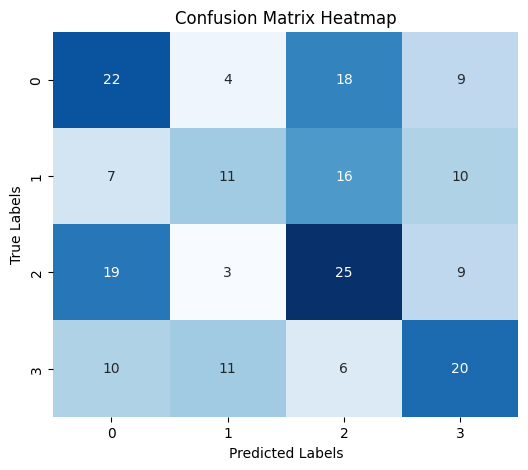

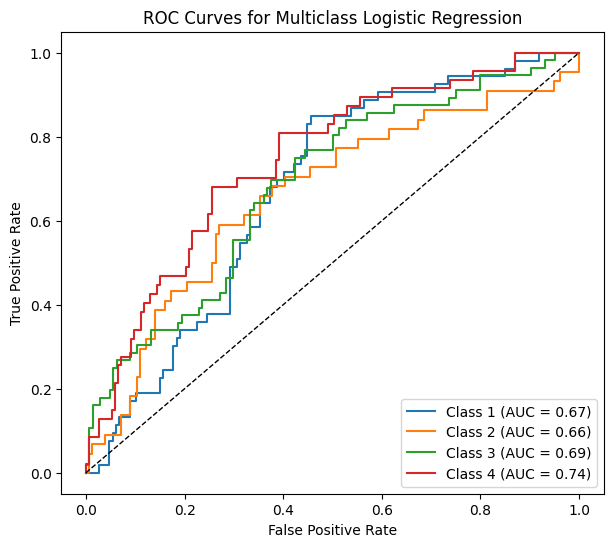

Mean ROC AUC: 0.691


In [ ]:
# Visual Evaluation (Confusion Matrix & ROC Curve)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Confusion Matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ROC Curve (for multiclass)
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
y_pred_proba = model.predict_proba(X_test)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 6))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f"Class {i+1} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title("ROC Curves for Multiclass Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Mean AUC
mean_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro')
print("Mean ROC AUC:", round(mean_auc, 3))


Top 10 Important Features:


,Feature,Importance
4,tenure,0.372181
6,ed,0.368665
1,retire,0.257138
3,income,0.119018
0,region,0.116107
7,age,0.093364
2,employ,0.073020
5,reside,0.071133


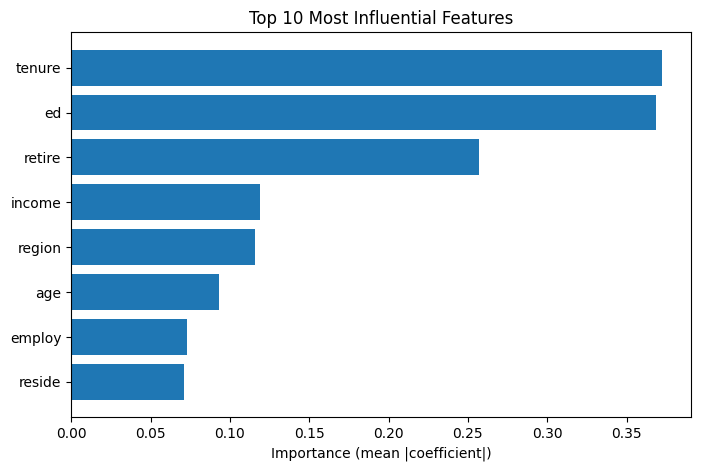

In [ ]:
# Feature Importance Analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract logistic regression coefficients for each feature
coefficients = model.coef_

# Calculate mean absolute importance across all classes
mean_importance = np.mean(np.abs(coefficients), axis=0)

# Create a DataFrame with feature names and their importance values
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': mean_importance
}).sort_values(by='Importance', ascending=False)

# Show top 10 most important features
print("Top 10 Important Features:")
display(importance_df.head(10))

# Plot a horizontal bar chart for visualization
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'].head(10)[::-1], importance_df['Importance'].head(10)[::-1])
plt.xlabel("Importance (mean |coefficient|)")
plt.title("Top 10 Most Influential Features")
plt.show()


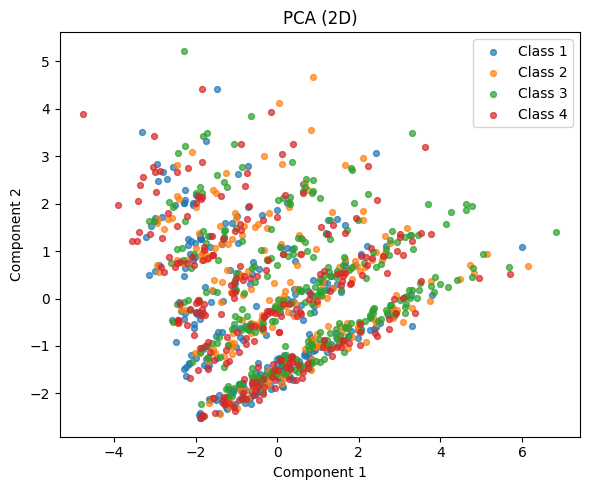

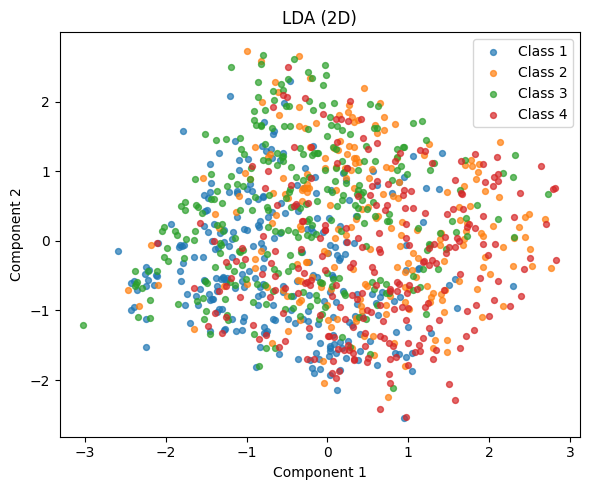

In [ ]:
# Section 4-1: PCA and LDA (2D visualization)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Select feature columns and target columns
ohe_cols = [c for c in df_final.columns if c.startswith("custcat_")]

# Define X (features) and y (target)
X = df_final.drop(columns=ohe_cols).values
y = np.argmax(df_final[ohe_cols].values, axis=1) + 1

# PCA - reduce data to 2 components
pca = PCA(n_components=2, random_state=42)
Z_pca = pca.fit_transform(X)

# LDA - reduce data to 2 components using class info
lda = LDA(n_components=2)
Z_lda = lda.fit_transform(X, y)

# Plot 2D scatter
def plot_2d(Z, y, title):
    plt.figure(figsize=(6,5))
    for cls in np.unique(y):
        plt.scatter(Z[y==cls, 0], Z[y==cls, 1], label=f'Class {cls}', alpha=0.7, s=18)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Show results
plot_2d(Z_pca, y, "PCA (2D)")
plot_2d(Z_lda, y, "LDA (2D)")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


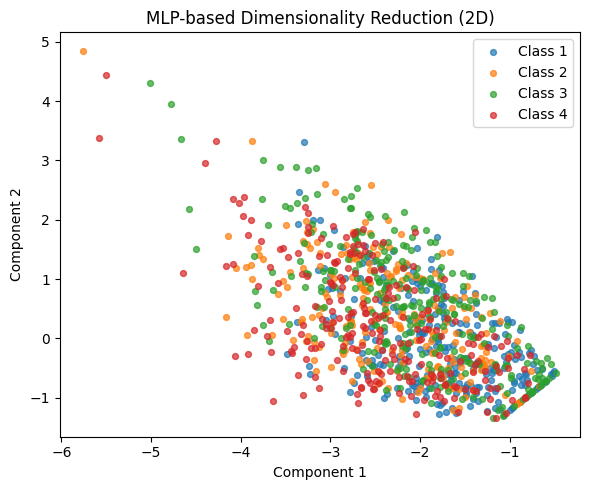

In [ ]:
# MLP for dimensionality reduction
import tensorflow as tf
from tensorflow.keras import layers, models

# Split input (X) and target (y)
ohe_cols = [c for c in df_final.columns if c.startswith("custcat_")]
X = df_final.drop(columns=ohe_cols).values
y = np.argmax(df_final[ohe_cols].values, axis=1) + 1

# Define simple autoencoder-like model
input_dim = X.shape[1]

# Encoder: compress data to 2D
model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(2, activation='linear', name='bottleneck')
])

# Decoder: reconstruct input (not needed for plotting but used for training)
decoder = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(5, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

# Combine encoder + decoder
autoencoder = models.Sequential([model, decoder])

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32, verbose=0)

# Get 2D encoded representation
Z_mlp = model.predict(X)

# Plot reduced features
plt.figure(figsize=(6,5))
for cls in np.unique(y):
    plt.scatter(Z_mlp[y==cls, 0], Z_mlp[y==cls, 1], label=f'Class {cls}', alpha=0.7, s=18)
plt.title("MLP-based Dimensionality Reduction (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.tight_layout()
plt.show()


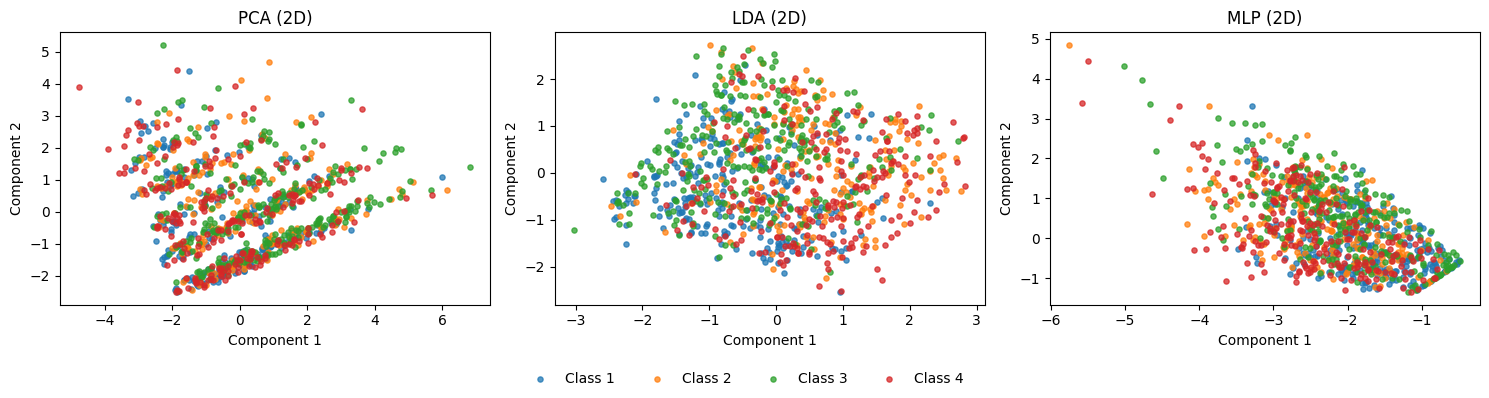

In [ ]:
# Compare PCA, LDA, and MLP (2D)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Prepare X, y (if not already in memory)
ohe_cols = [c for c in df_final.columns if c.startswith("custcat_")]
X = df_final.drop(columns=ohe_cols).values
y = np.argmax(df_final[ohe_cols].values, axis=1) + 1

# Ensure 2D representations exist
try:
    Z_pca
except NameError:
    Z_pca = PCA(n_components=2, random_state=42).fit_transform(X)

try:
    Z_lda
except NameError:
    Z_lda = LDA(n_components=2).fit_transform(X, y)

try:
    Z_mlp
except NameError:
    # very light encoder (fallback) to get a quick 2D view
    import tensorflow as tf
    from tensorflow.keras import layers, models
    enc = models.Sequential([layers.Input(shape=(X.shape[1],)),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(5, activation='relu'),
                             layers.Dense(2, name='bottleneck')])
    dec = models.Sequential([layers.Input(shape=(2,)),
                             layers.Dense(5, activation='relu'),
                             layers.Dense(10, activation='relu'),
                             layers.Dense(X.shape[1])])
    ae = models.Sequential([enc, dec])
    ae.compile(optimizer='adam', loss='mse')
    ae.fit(X, X, epochs=25, batch_size=32, verbose=0)
    Z_mlp = enc.predict(X, verbose=0)

# Simple scatter helper
def scatter(ax, Z, y, title):
    for cls in np.unique(y):
        ax.scatter(Z[y==cls, 0], Z[y==cls, 1], s=14, alpha=0.75, label=f'Class {cls}')
    ax.set_title(title); ax.set_xlabel('Component 1'); ax.set_ylabel('Component 2')

# Draw three panels
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
scatter(axes[0], Z_pca, y, "PCA (2D)")
scatter(axes[1], Z_lda, y, "LDA (2D)")
scatter(axes[2], Z_mlp, y, "MLP (2D)")
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, frameon=False)
plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()
